BloomTech Data Science

*Unit 2, Sprint 2, Module 1*

---

# Module Project: Decision Trees

This week, the module projects will focus on creating and improving a model for the Tanazania Water Pump dataset. Your goal is to create a model to predict whether a water pump is functional, non-functional, or functional needs repair.


## Directions

The tasks for this project are as follows:

- **Task 1:** Sign up for a [Kaggle](https://www.kaggle.com/) account. Join the kaggle competition, and download the water pump dataset.
- **Task 2:** Use `wrangle` function to import training and test data.
- **Task 3:** Split training data into feature matrix `X` and target vector `y`.
- **Task 4:** Split feature matrix `X` and target vector `y` into training and validation sets.
- **Task 5:** Establish the baseline accuracy score for your dataset.
- **Task 6:** Build and train `model_dt`.
- **Task 7:** Calculate the training and validation accuracy score for your model.
- **Task 8:** Adjust model's `max_depth` to reduce overfitting.
- **Task 9 `stretch goal`:** Create a horizontal bar chart showing the 10 most important features for your model.

You should limit yourself to the following libraries for this project:

- `category_encoders`
- `matplotlib`
- `pandas`
- `pandas-profiling`
- `sklearn`

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pandas_profiling import ProfileReport
from category_encoders import OneHotEncoder, OrdinalEncoder

from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

from sklearn.tree import DecisionTreeClassifier, plot_tree

from sklearn.metrics import accuracy_score

# Kaggle

**Task 1:** [Sign up for a Kaggle account](https://www.kaggle.com/), if you don’t already have one. **We recommend that you choose a username that's based on your name, since you might include it in your resume in the future.** Go to our Kaggle competition website (the URL is given on Canvas). Go to the **Rules** page. Accept the rules of the competition and download the dataset. Notice that the **Rules** page also has instructions for the Submission process. The **Data** page has feature definitions.

# I. Wrangle Data

In [2]:
def wrangle(fm_path, tv_path=None):
    if tv_path:
        df = pd.merge(pd.read_csv(fm_path, 
                                  na_values=[0, -2.000000e-08]),
                      pd.read_csv(tv_path)).set_index('id')
    else:
        df = pd.read_csv(fm_path, 
                         na_values=[0, -2.000000e-08],
                         index_col='id')

    # Drop constant columns
    df.drop(columns=['recorded_by'], inplace=True)

    # Drop HCCCs
    cutoff = 100
    drop_cols = [col for col in df.select_dtypes('object').columns
                 if df[col].nunique() > cutoff]
    df.drop(columns=drop_cols, inplace=True)

    # Drop duplicate columns
    dupe_cols = [col for col in df.head(100).T.duplicated().index
                 if df.head(100).T.duplicated()[col]]
    df.drop(columns=dupe_cols, inplace=True)             

    return df

**Task 1:** Using the `wrangle` function above, read the `train_features.csv` and  `train_labels.csv` files into the DataFrame `df`. Next, use the same function to read the test set `test_features.csv` into the DataFrame `X_test`.

In [3]:
df = wrangle('train_features.csv', 'train_labels.csv')
X_test = wrangle('test_features.csv')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 47519 entries, 454.0 to 23812.0
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   amount_tsh             14189 non-null  float64
 1   gps_height             31245 non-null  float64
 2   longitude              46086 non-null  float64
 3   latitude               46086 non-null  float64
 4   num_private            617 non-null    float64
 5   basin                  47519 non-null  object 
 6   region                 47519 non-null  object 
 7   region_code            47519 non-null  int64  
 8   district_code          47500 non-null  float64
 9   population             30472 non-null  float64
 10  public_meeting         44831 non-null  object 
 11  scheme_management      44417 non-null  object 
 12  permit                 45080 non-null  object 
 13  construction_year      31017 non-null  float64
 14  extraction_type        47519 non-null  object 

# II. Split Data

**Task 3:** Split your DataFrame `df` into a feature matrix `X` and the target vector `y`. You want to predict `'status_group'`.

In [4]:
target = 'status_group'

X = df.drop(target, axis=1)
y = df[target]

**Task 4:** Using a randomized split, divide `X` and `y` into a training set (`X_train`, `y_train`) and a validation set (`X_val`, `y_val`).

In [5]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=42)

# III. Establish Baseline

**Task 5:** Since this is a **classification** problem, you should establish a baseline accuracy score. Figure out what is the majority class in `y_train` and what percentage of your training observations it represents.

In [6]:
# print(y_val.value_counts(normalize=True))

baseline_acc = y_val.value_counts(normalize=True).max() #functional
print('Baseline Accuracy Score:', baseline_acc)

Baseline Accuracy Score: 0.5441919191919192


# IV. Build Model

**Task 6:** Build a `Pipeline` named `model_dt`, and fit it to your training data. Your `Pipeline` should include:

- an `OrdinalEncoder` transformer for categorical features.
- a `SimpleImputer` transformer fot missing values.
- a `DecisionTreeClassifier` predictor.

**Note:** Don't forget to set the `random_state` parameter for your `DecisionTreeClassifier`.

In [7]:
model_dt = make_pipeline(OrdinalEncoder(),SimpleImputer(),DecisionTreeClassifier(min_samples_split=650,max_depth=8,random_state=41))

model_dt.fit(X_train, y_train)

model_dt

Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['basin', 'region', 'public_meeting',
                                      'scheme_management', 'permit',
                                      'extraction_type',
                                      'extraction_type_group',
                                      'extraction_type_class', 'management',
                                      'management_group', 'payment',
                                      'payment_type', 'water_quality',
                                      'quality_group', 'quantity', 'source',
                                      'source_type', 'source_class',
                                      'waterpoint_type',
                                      'waterpoin...
communal standpipe multiple    4
improved spring                5
cattle trough                  6
dam                            7
NaN                           -2
dtype: int64},
                                         {'col': 'waterpoint_type_group',
                                          'data_type': dtype('O'),
                                          'mapping': communal standpipe    1
hand pump             2
other                 3
improved spring       4
cattle trough         5
dam                   6
NaN                  -2
dtype: int64}])),
                ('simpleimputer', SimpleImputer()),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=8, min_samples_split=650,
                                        random_state=41))])

# V. Check Metrics

**Task 7:** Calculate the training and validation accuracy scores for `model_dt`.

In [8]:
training_acc = accuracy_score(y_train, model_dt.predict(X_train))
val_acc = accuracy_score(y_val, model_dt.predict(X_val))

print('Training Accuracy Score:', training_acc)
print('Validation Accuracy Score:', val_acc)

Training Accuracy Score: 0.7277420803052835
Validation Accuracy Score: 0.724915824915825


# VI. Tune Model

**Task 8:** Is there a large difference between your training and validation accuracy? If so, experiment with different setting for `max_depth` in your `DecisionTreeClassifier` to reduce the amount of overfitting in your model.

In [11]:
# Use this cell to experiment and then change 
# your model hyperparameters in Task 6

sample_intervals = np.arange(550, 700, 50)
max_depth_intervals = np.arange(5, 9, 1)

score = []

sample = 650
depth = 8

if False:
    for sample in sample_intervals:
        for depth in max_depth_intervals:
            model_t = make_pipeline(OrdinalEncoder(),SimpleImputer(),DecisionTreeClassifier(min_samples_split=sample,max_depth=depth,random_state=41))
            model_t.fit(X_train, y_train)
        
            score.append((depth, sample, accuracy_score(y_train, model_t.predict(X_train)),accuracy_score(y_val, model_t.predict(X_val))))
else:
    model_t = make_pipeline(OrdinalEncoder(),SimpleImputer(),DecisionTreeClassifier(min_samples_split=sample,max_depth=depth,random_state=41))
    model_t.fit(X_train, y_train)
    score.append((accuracy_score(y_train, model_t.predict(X_train)),accuracy_score(y_val, model_t.predict(X_val))))
    
for tup in score:
    print(tup)

(0.7277420803052835, 0.724915824915825)


# VII. Communicate Results

**Task 9 `stretch goal`:** Create a horizontal barchart that shows the the 10 most important features for model_dt, sorted by value.

**Note:** [`DecisionTreeClassifier.feature_importances_`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html?highlight=decisiontreecla#sklearn.tree.DecisionTreeClassifier.feature_importances_) returns values that are different from [`LogisticRegression.coef_`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html). All the values will be positive, and they will sum to `1`.

Text(0.5, 0, 'gini importance')

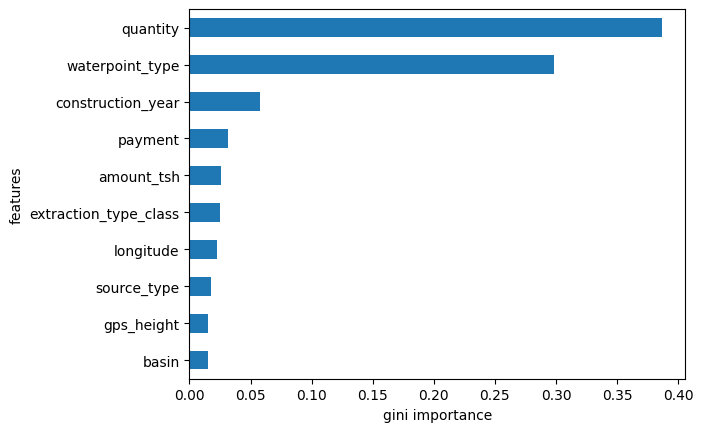

In [28]:
features = model_dt.named_steps['ordinalencoder'].get_feature_names()
gini_importances =  model_dt.named_steps['decisiontreeclassifier'].feature_importances_
pd.Series(data=gini_importances, index=features).sort_values().tail(10).plot(kind='barh')
plt.ylabel('features')
plt.xlabel('gini importance')

In [36]:
# Kaggle Submission

df_test = wrangle('test_features.csv')

prediction = pd.DataFrame(data=model_dt.predict(df_test), index=df_test.index)
prediction.columns = ['status_group']

prediction.head()

,status_group
id,
37098,non functional
14530,functional
62607,functional
46053,functional
47083,functional


In [37]:
prediction.to_csv('submission.csv')